In [1]:
import pandas as pd

df_aluno = pd.read_json('thiago/Aluno.json')
df_BeneficioGovernoFederal = pd.read_json("thiago/BeneficioGovernoFederal.json")
df_Caracterizacao = pd.read_json("thiago/Caracterizacao.json")
df_CompanhiaDomiciliar = pd.read_json("thiago/CompanhiaDomiciliar.json")
df_ContribuinteRendaFamiliar = pd.read_json("thiago/ContribuinteRendaFamiliar.json")
df_CursoCampus = pd.read_json("thiago/CursoCampus.json")
df_EstadoCivil = pd.read_json("thiago/EstadoCivil.json")
df_Idioma = pd.read_json("thiago/Idioma.json")
df_MatriculaPeriodo = pd.read_json("thiago/MatriculaPeriodo.json")
df_MeioTransporte = pd.read_json("thiago/MeioTransporte.json")
df_NecessidadeEspecial = pd.read_json("thiago/NecessidadeEspecial.json")
df_Raca = pd.read_json("thiago/Raca.json")
df_RazaoAfastamentoEducacional = pd.read_json("thiago/RazaoAfastamentoEducacional.json")
df_SituacaoMatricula = pd.read_json("thiago/SituacaoMatricula.json")
df_SituacaoMatriculaPeriodo = pd.read_json("thiago/SituacaoMatriculaPeriodo.json")
df_SituacaoTrabalho = pd.read_json("thiago/SituacaoTrabalho.json")
df_TipoAcessoInternet = pd.read_json("thiago/TipoAcessoInternet.json")
df_TipoAreaResidencial = pd.read_json("thiago/TipoAreaResidencial.json")
df_TipoEscola = pd.read_json("thiago/TipoEscola.json")
df_TipoImovelResidencial = pd.read_json("thiago/TipoImovelResidencial.json")
df_TipoServicoSaude = pd.read_json("thiago/TipoServicoSaude.json")

#novos frames
df_Disciplina = pd.read_json("thiago/Disciplina.json")
df_NivelEscolaridade = pd.read_json("thiago/NivelEscolaridade.json")
df_Notas = pd.read_json("thiago/Notas.json")
df_SituacaoDisciplina = pd.read_json("thiago/SituacaoDisciplina.json")


In [52]:
#df_Disciplina.head
#df_NivelEscolaridade.head
#df_SituacaoDisciplina.head
#print(df_Notas.head)
#print(df_MatriculaPeriodo.head)
print(df_SituacaoDisciplina.head)

#merged = pd.merge(df_MatriculaPeriodo, df_Notas, left_on="aluno_id", right_on="matricula_periodo_id", suffixes=["_L", "_R"])

#print(df_Caracterizacao.shape)
#print(df_Notas.shape)
#print(merged.shape)

#qnt de disciplinas
df_Notas.groupby(['disciplina_id']).count()

df_Notas.columns

<bound method NDFrame.head of                        descricao  id
0                       Cursando   1
1                       Aprovado   2
2                      Reprovado   3
3                    Prova Final   4
4            Reprovado por falta   5
5                       Trancado   6
6                      Cancelado   7
7                     Dispensado   8
8                       Pendente   9
9   Aprovado/Reprovado no Módulo  10
10                   Transferido  13>


Index(['disciplina_id', 'matricula_periodo_id', 'media_final',
       'percentual_frequencia', 'situacao_id'],
      dtype='object')

LinAlgError: singular matrix

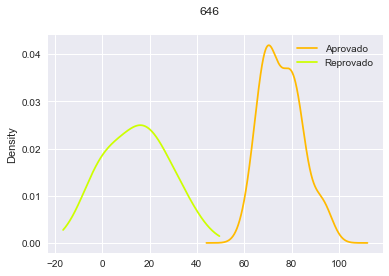

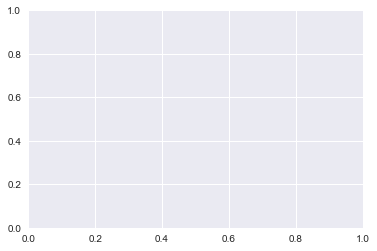

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import numpy as np

plt.close('all')
%matplotlib inline

#grouped = df_Notas.groupby(['disciplina_id'])
#f, ax = plt.subplots()
#nrows = df_Notas.groupby(['disciplina_id'])['media_final'].size().count()
#fig, axs = plt.subplots(nrows=nrows, ncols=3)
#targets = zip(grouped.groups.keys(), axs.flatten())

#for i, (key, ax) in enumerate(targets):
    #ax.plot(grouped.get_group(key))
    #ax.set_title('a=%d'%key)

cont = 0

#merged = pd.merge(df_Notas, df_SituacaoDisciplina, left_on="situacao_id", right_on="id", suffixes=["_L", "_R"])
#print(merged.head)

cmap = plt.get_cmap('gist_rainbow')
colors = cmap(np.linspace(0, 1, 13))

df = df_Notas

for index1, group1 in df.groupby(['disciplina_id']):
    fig = plt.figure()
    
    for index2, group2 in group1.groupby(['situacao_id']):
        
        if (df_SituacaoDisciplina[df_SituacaoDisciplina.id==index2].empty):
            l = "sem legenda"
        else:
            l = df_SituacaoDisciplina[df_SituacaoDisciplina.id==index2][['descricao']].values[0][0]
        
        #group2['media_final'].plot.hist(title=index1, subplots=True, color=colors[index2], legend=True, 
        #                                label=l)
        group2['media_final'].plot.kde(title=index1, subplots=True, color=colors[index2], legend=True, 
                                        label=l)
        
    cont += 1
    if cont == 5:
        break

        